In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(r"C:\Users\Harshiv kruthik\Downloads\RPC12_Input_For_Participants (1)\RPC12_Input_For_Participants\datasets\electric_vehicle_sales_by_state.csv")
df

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229
...,...,...,...,...,...
2440,01-Mar-24,Mizoram,2-Wheelers,58,1932
2441,01-Mar-24,DNH and DD,2-Wheelers,25,780
2442,01-Mar-24,Manipur,2-Wheelers,13,1394
2443,01-Mar-24,Andaman & Nicobar Island,2-Wheelers,2,447


In [7]:
df.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [9]:
df.columns

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold'],
      dtype='object')

In [11]:
df.isnull().sum()

date                      0
state                     0
vehicle_category          0
electric_vehicles_sold    0
total_vehicles_sold       0
dtype: int64

In [15]:
df.shape

(2445, 5)

In [31]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Filter the data for years 2022 and 2024
df_2022 = df[df['year'] == 2022]
df_2024 = df[df['year'] == 2024]

# Group by state and sum the electric vehicles sold
ev_sales_2022 = df_2022.groupby('state')['electric_vehicles_sold'].sum().reset_index()
ev_sales_2024 = df_2024.groupby('state')['electric_vehicles_sold'].sum().reset_index()

# Merge the two datasets to compare EV sales between 2022 and 2024
sales_comparison = pd.merge(ev_sales_2022, ev_sales_2024, on='state', suffixes=('_2022', '_2024'))

# Calculate the growth rate of EV sales
sales_comparison['growth'] = (sales_comparison['electric_vehicles_sold_2024'] - 
                              sales_comparison['electric_vehicles_sold_2022'])

# Filter states with negative growth (decline in EV sales)
negative_growth_states = sales_comparison[sales_comparison['growth'] < 0].head(5)

# Display the states with negative EV penetration

print(negative_growth_states[['state', 'electric_vehicles_sold_2022', 'electric_vehicles_sold_2024', 'growth']])



                      state  electric_vehicles_sold_2022  \
0  Andaman & Nicobar Island                           23   
1            Andhra Pradesh                        28050   
3                     Assam                         1984   
4                     Bihar                        10071   
5                Chandigarh                         1129   

   electric_vehicles_sold_2024  growth  
0                            9     -14  
1                        12638  -15412  
3                         1364    -620  
4                         5401   -4670  
5                          763    -366  


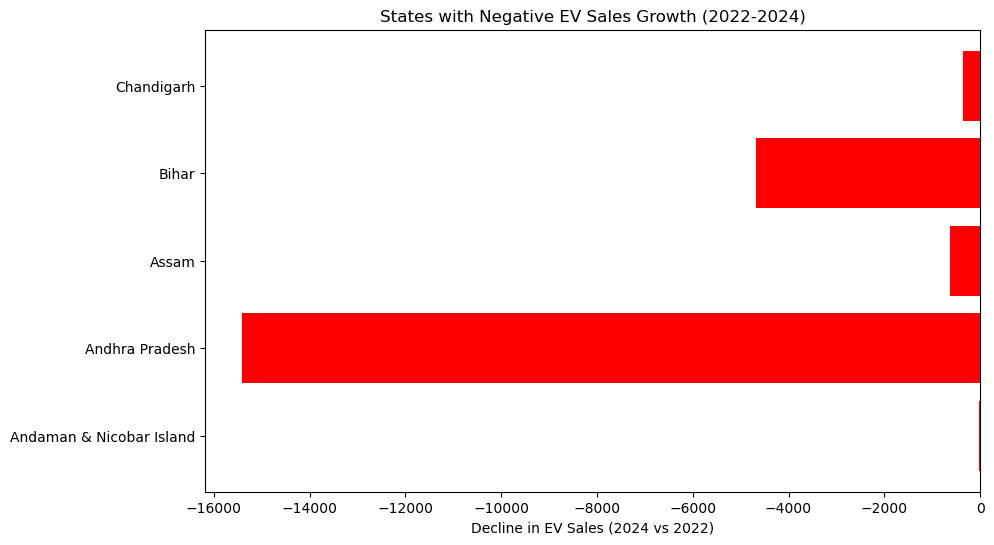

In [29]:
plt.figure(figsize=(10, 6))
plt.barh(negative_growth_states['state'], negative_growth_states['growth'], color='red')
plt.xlabel('Decline in EV Sales (2024 vs 2022)')
plt.title('States with Negative EV Sales Growth (2022-2024)')
plt.show()

In [35]:
# Filter the data for 2024 and for Delhi and Karnataka
df_2024 = df[df['year'] == 2024]
df_2024_states = df_2024[df_2024['state'].isin(['Delhi', 'Karnataka'])]

# Group by state and sum the electric and total vehicles sold
ev_sales_2024 = df_2024_states.groupby('state')[['electric_vehicles_sold', 'total_vehicles_sold']].sum().reset_index()

# Calculate penetration rate for both states
ev_sales_2024['penetration_rate'] = (ev_sales_2024['electric_vehicles_sold'] / ev_sales_2024['total_vehicles_sold']) * 100

# Display the EV sales and penetration rate comparison
print(ev_sales_2024[['state', 'electric_vehicles_sold', 'total_vehicles_sold', 'penetration_rate']])

       state  electric_vehicles_sold  total_vehicles_sold  penetration_rate
0      Delhi                   13277               155839          8.519690
1  Karnataka                   51247               430905         11.892877


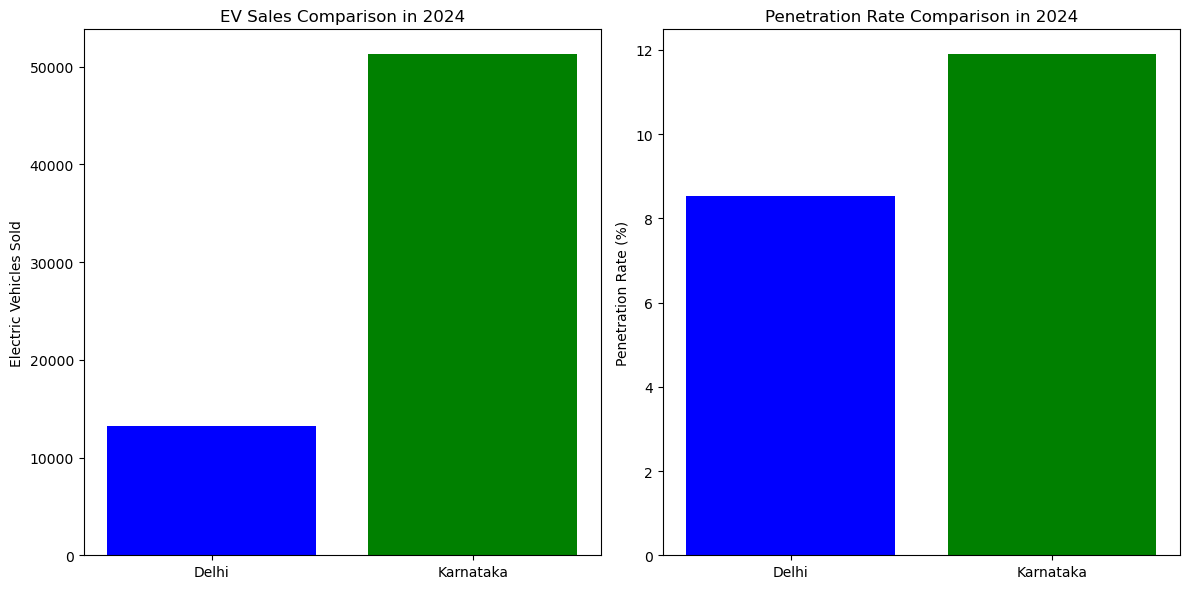

In [37]:
# Visualization: Compare EV Sales
plt.figure(figsize=(12, 6))

# Bar chart for EV sales comparison
plt.subplot(1, 2, 1)
plt.bar(ev_sales_2024['state'], ev_sales_2024['electric_vehicles_sold'], color=['blue', 'green'])
plt.title('EV Sales Comparison in 2024')
plt.ylabel('Electric Vehicles Sold')

# Bar chart for Penetration Rate comparison
plt.subplot(1, 2, 2)
plt.bar(ev_sales_2024['state'], ev_sales_2024['penetration_rate'], color=['blue', 'green'])
plt.title('Penetration Rate Comparison in 2024')
plt.ylabel('Penetration Rate (%)')

plt.tight_layout()
plt.show()

In [51]:
# Filter the data for years 2022 to 2024
df_filtered = df[(df['year'] >= 2022) & (df['year'] <= 2024)].copy()  

# Extract the month from the 'date' column
df_filtered['month'] = df_filtered['date'].dt.month

# Group by month and sum the electric vehicles sold
monthly_sales = df_filtered.groupby('month')['electric_vehicles_sold'].sum().reset_index()

# Identify peak and low season months
peak_month = monthly_sales[monthly_sales['electric_vehicles_sold'] == monthly_sales['electric_vehicles_sold'].max()]
low_month = monthly_sales[monthly_sales['electric_vehicles_sold'] == monthly_sales['electric_vehicles_sold'].min()]

print("Peak month for EV sales:", peak_month)
print("Low month for EV sales:", low_month)



Peak month for EV sales:    month  electric_vehicles_sold
2      3                  291587
Low month for EV sales:    month  electric_vehicles_sold
5      6                  101222


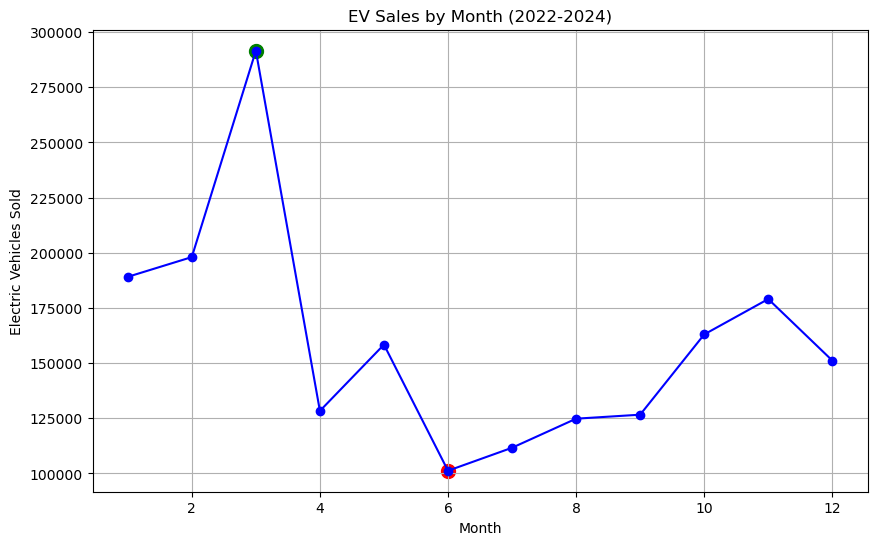

In [59]:
# Visualization: Plot the monthly EV sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['month'], monthly_sales['electric_vehicles_sold'], marker='o', color='blue')
plt.title('EV Sales by Month (2022-2024)')
plt.xlabel('Month')
plt.ylabel('Electric Vehicles Sold')
plt.grid(True)

# Highlight peak and low seasons on the graph
plt.scatter(peak_month['month'], peak_month['electric_vehicles_sold'], color='green', s=100, label='Peak Month')
plt.scatter(low_month['month'], low_month['electric_vehicles_sold'], color='red', s=100, label='Low Month')

In [78]:
# Filter data for years 2021 and 2024
df_2021 = df[df['year'] == 2021]
df_2024 = df[df['year'] == 2024]

# Group by state and sum EV sales for 2021 and 2024
ev_sales_2021 = df_2021.groupby('state')['electric_vehicles_sold'].sum().reset_index()
ev_sales_2024 = df_2024.groupby('state')['electric_vehicles_sold'].sum().reset_index()

# Merge the two datasets to compare EV sales between 2021 and 2024
sales_cagr = pd.merge(ev_sales_2021, ev_sales_2024, on='state', suffixes=('_2021', '_2024'))

# Calculate CAGR for each state
sales_cagr['CAGR'] = ((sales_cagr['electric_vehicles_sold_2024'] / sales_cagr['electric_vehicles_sold_2021'])**(1/3) - 1) * 100

# Filter the data to calculate penetration rate in 2024
df_2024['penetration_rate'] = df_2024['electric_vehicles_sold'] / df_2024['total_vehicles_sold']

# Group by state and calculate the average penetration rate
state_penetration_rate_2024 = df_2024.groupby('state')['penetration_rate'].mean().reset_index()

# Merge CAGR data with penetration rate data
top_states = pd.merge(state_penetration_rate_2024, sales_cagr, on='state')

# Sort by penetration rate and select top 10 states
top_10_states = top_states.sort_values(by='penetration_rate', ascending=False).head(10)

# Project EV sales in 2030 using the CAGR formula
top_10_states['projected_sales_2030'] = top_10_states['electric_vehicles_sold_2024'] * ((1 + top_10_states['CAGR'] / 100) ** 6)

print("Top 10 States by Penetration Rate and Projected EV Sales in 2030:")
print(top_10_states[['state', 'electric_vehicles_sold_2024', 'CAGR', 'projected_sales_2030']])


Top 10 States by Penetration Rate and Projected EV Sales in 2030:
          state  electric_vehicles_sold_2024       CAGR  projected_sales_2030
16       Kerala                        22533  49.431018         250878.561400
9           Goa                         3875  62.502976          71357.498967
15    Karnataka                        51247  26.688950         211885.316640
5    Chandigarh                          763  39.180813           5546.266616
8         Delhi                        13277  17.916359          35689.816983
19  Maharashtra                        61823  38.145182         429699.187854
17       Ladakh                           14  32.635240             76.222222
29   Tamil Nadu                        31547  16.421701          78552.807438
27    Rajasthan                        19018  17.284757          49501.034463
24       Odisha                         7969  21.427041          25544.434450


C:\Users\Harshiv kruthik\AppData\Local\Temp\ipykernel_3648\527635324.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['penetration_rate'] = df_2024['electric_vehicles_sold'] / df_2024['total_vehicles_sold']


C:\Users\Harshiv kruthik\AppData\Local\Temp\ipykernel_3648\502007968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_states, x='state', y='projected_sales_2030', palette='Blues_d')


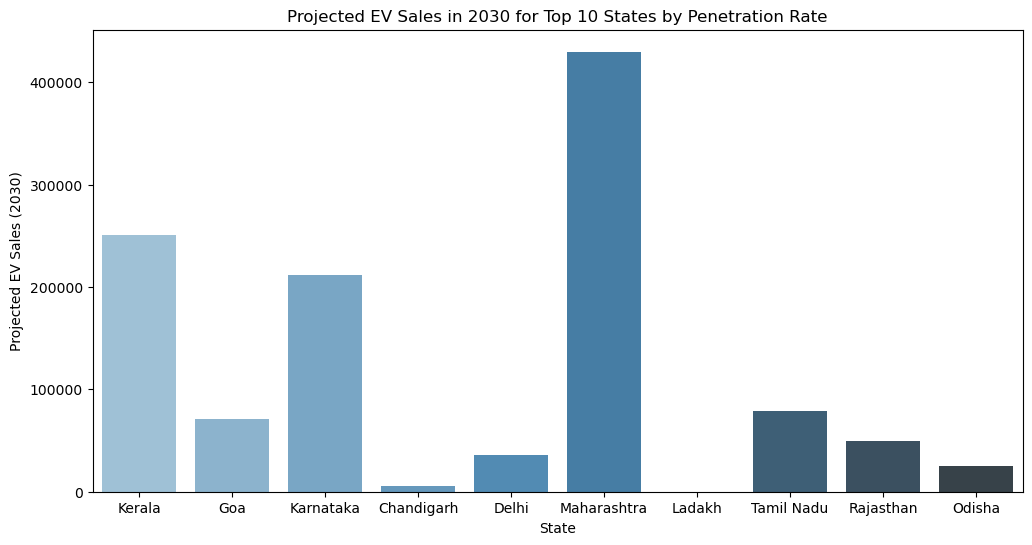

In [86]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_states, x='state', y='projected_sales_2030', palette='Blues_d')
plt.title('Projected EV Sales in 2030 for Top 10 States by Penetration Rate')
plt.xlabel('State')
plt.ylabel('Projected EV Sales (2030)')
plt.show()


In [88]:
df1=pd.read_csv(r"C:\Users\Harshiv kruthik\Downloads\RPC12_Input_For_Participants (1)\RPC12_Input_For_Participants\datasets\electric_vehicle_sales_by_makers.csv")
df1

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0
...,...,...,...,...
811,01-Mar-24,2-Wheelers,BGAUSS,3070
812,01-Mar-24,2-Wheelers,BATTRE ELECTRIC,625
813,01-Mar-24,2-Wheelers,KINETIC GREEN,3915
814,01-Mar-24,2-Wheelers,REVOLT,585


In [96]:
df1.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


In [110]:
 #Convert 'date' column to datetime format
df1['date'] = pd.to_datetime(df1['date'], format='%d-%b-%y')

# Filter data for 4-Wheelers and for years 2022 to 2024
df1['year'] = df1['date'].dt.year
df1['quarter'] = df1['date'].dt.to_period('Q')

df1_4_wheelers = df1[(df1['vehicle_category'] == '4-Wheelers') & (df1['year'].isin([2022, 2023, 2024]))]

# Group by maker and quarter, summing electric vehicles sold
quarterly_sales = df1_4_wheelers.groupby(['maker', 'quarter'])['electric_vehicles_sold'].sum().reset_index()

# Find top 5 makers based on total sales volume
top_makers = quarterly_sales.groupby('maker')['electric_vehicles_sold'].sum().nlargest(5).index.tolist()
top_quarterly_sales = quarterly_sales[quarterly_sales['maker'].isin(top_makers)].head(5)

# Convert quarter to string for easier plotting
top_quarterly_sales['quarter'] = top_quarterly_sales['quarter'].astype(str)

# Print results for verification
print(top_quarterly_sales)

        maker quarter  electric_vehicles_sold
9   BYD India  2022Q1                      32
10  BYD India  2022Q2                      81
11  BYD India  2022Q3                     113
12  BYD India  2022Q4                     103
13  BYD India  2023Q1                     623


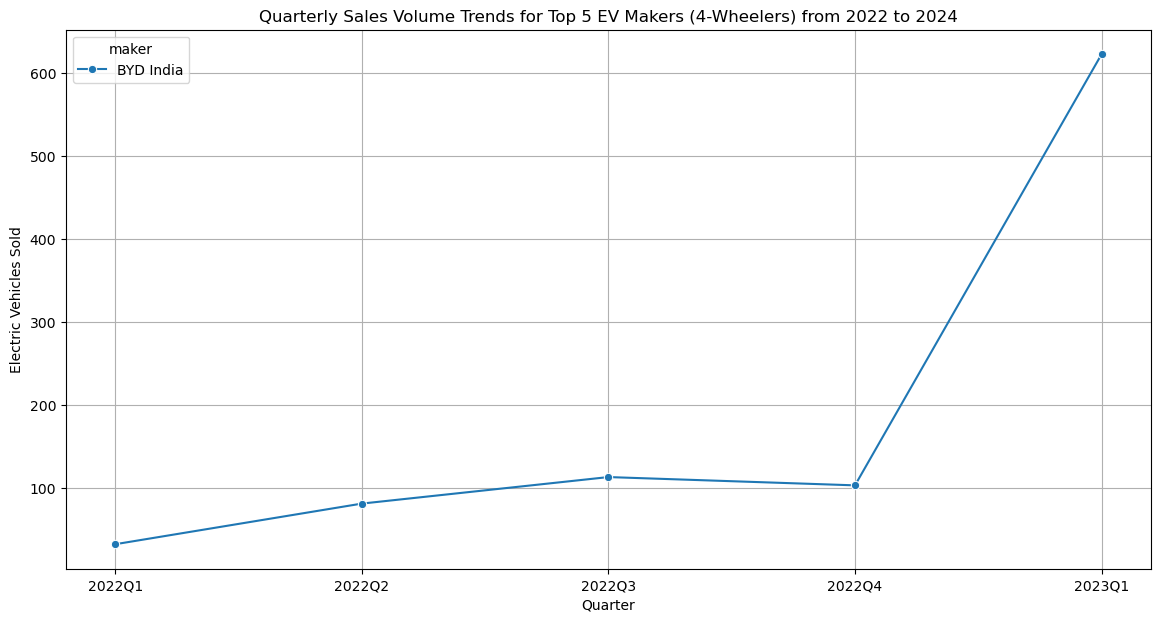

In [120]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=top_quarterly_sales, x='quarter', y='electric_vehicles_sold', hue='maker', marker='o')
plt.title('Quarterly Sales Volume Trends for Top 5 EV Makers (4-Wheelers) from 2022 to 2024')
plt.xlabel('Quarter')
plt.ylabel('Electric Vehicles Sold')
plt.grid()
plt.show()

In [122]:
df1['date'] = pd.to_datetime(df1['date'], format='%d-%b-%y')

# Filter data for 4-Wheelers and for years 2022 to 2024
df1['year'] = df1['date'].dt.year
df1_4_wheelers = df1[(df1['vehicle_category'] == '4-Wheelers') & (df1['year'].isin([2022, 2023, 2024]))]

# Group by maker and year, summing electric vehicles sold
yearly_sales = df1_4_wheelers.groupby(['maker', 'year'])['electric_vehicles_sold'].sum().reset_index()

# Find top 5 makers based on total sales volume over the years
top_makers = yearly_sales.groupby('maker')['electric_vehicles_sold'].sum().nlargest(5).index.tolist()
top_yearly_sales = yearly_sales[yearly_sales['maker'].isin(top_makers)]

# Pivot the data for easier calculation of CAGR
pivot_sales = top_yearly_sales.pivot(index='maker', columns='year', values='electric_vehicles_sold').reset_index()

# Define a function to calculate CAGR
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Calculate CAGR for each maker from 2022 to 2024 (2 years period)
pivot_sales['CAGR'] = pivot_sales.apply(lambda row: calculate_cagr(row[2022], row[2024], 2) if row[2022] > 0 else np.nan, axis=1)

# Display the top makers with their CAGR
print(pivot_sales[['maker', 2022, 2024, 'CAGR']])

year                maker   2022   2024       CAGR
0               BYD India    329    400  10.263569
1           Hyundai Motor    447    338 -13.042992
2                MG Motor   2484   2622   2.740233
3     Mahindra & Mahindra  10215   2316 -52.384309
4             Tata Motors  24352  17361 -15.565478


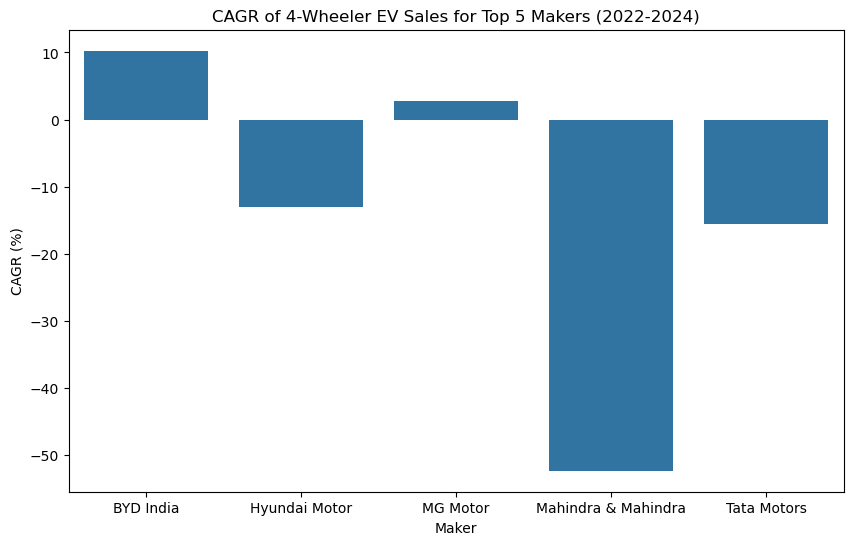

In [130]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_sales, x='maker', y='CAGR')
plt.title('CAGR of 4-Wheeler EV Sales for Top 5 Makers (2022-2024)')
plt.xlabel('Maker')
plt.ylabel('CAGR (%)')
plt.show()